# Лабораторная работа №3

## 1. Содержание работы
```
1. Обработка данных массивов
    1.1. Поиск наименьшего и наибольшего элементов
    1.2. Сортировка массивов
2. Интерполяция и аппроксимация табличных функций средствами Python
3. Создание программы для кусочной интерполяции табличной функции линейной функцией
4. Создание программы для аппроксимации табличной функции методом наименьших квадратов: а) линейной функцией, б) квадратичным трёхчленом.

5. Экспорт и импорт данных для обработки

## Ход выполнения работы

### Задание 1.
Сгенерируйте массив случайных чисел длиной 100. Найдите наибольший и наименьший элементы, а также их индексы. Отсортируйте массив по возрастанию и убыванию

In [11]:
import numpy as np

arr = np.random.randint(0,100,100)

max_value = np.max(arr)
min_value = np.min(arr)
max_idx = np.argmax(arr)
min_idx = np.argmin(arr)

print(arr)

print("Максимальное значение:", max_value)
print("Индекс максимального значения:", max_idx)
print("Минимальное значение:", min_value)
print("Индекс минимального значения:", min_idx)

[26 23 63 42 15 32 41 65 54 34 83 27 55 42 55 98 17  1 69 64 95 78 49 12
 44 53 86 80 97 62 90 37 30 73 20 59 68 20 38 46 40 42 44 88 60 34 20 50
 56 63 31  4 31 91 65 90  7 20 55  7 77 46 54 24 87 71 36 12 48 32 30 18
 61 23 33 36 31 93 84 44 49 34 46 67 33 64 74 27 46 71 74 74 46 53 18 94
 21 71  5 36]
Максимальное значение: 98
Индекс максимального значения: 15
Минимальное значение: 1
Индекс минимального значения: 17


### Задание 2 (Вариант 8)

Произведите интерполяцию и аппроксимацию табличной функции встроенными в Python функциями scipy.interpolate.interp1d() и numpy.polyfit внутри имеющегося диапазона значения, но с шагом 0.01. При интерполяции использовать  квадратичную и ступенчатую. Сравните полученные результаты визуально ("на глаз").

	
|  х  |  y  |
|----|----|
|-4.38|1.73|
|-3.84|2.56|
|-3.23|3.39|
|-2.76|4.22|
|-2.22|5.05|
|-1.67|5.89|
|-1.13|6.70|
|-0.60|7.53|

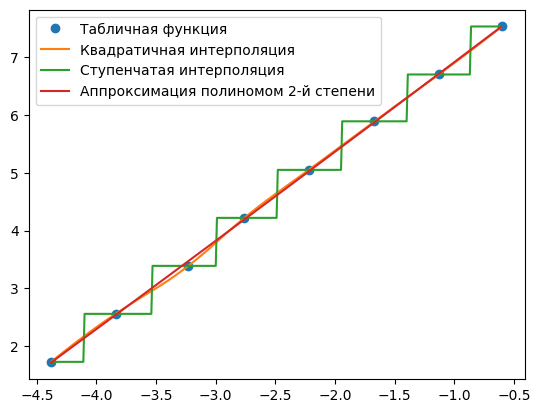

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Табличная функция
x = np.array([-4.38, -3.84, -3.23, -2.76, -2.22, -1.67, -1.13, -0.60])
y = np.array([1.73, 2.56, 3.39, 4.22, 5.05, 5.89, 6.70, 7.53])

# Интерполяция с помощью квадратичной функции
f_quad = interp1d(x, y, kind='quadratic')
x_interp_quad = np.arange(x.min(), x.max(), 0.01)
y_interp_quad = f_quad(x_interp_quad)

# Интерполяция с помощью ступенчатой функции
f_step = interp1d(x, y, kind='nearest')
x_interp_step = np.arange(x.min(), x.max(), 0.01)
y_interp_step = f_step(x_interp_step)

# Аппроксимация с помощью полинома 2-й степени
coeffs = np.polyfit(x, y, 2)
p = np.poly1d(coeffs)
x_approx = np.arange(x.min(), x.max(), 0.01)
y_approx = p(x_approx)

# Визуализация результатов
plt.plot(x, y, 'o', label='Табличная функция')
plt.plot(x_interp_quad, y_interp_quad, label='Квадратичная интерполяция')
plt.plot(x_interp_step, y_interp_step, label='Ступенчатая интерполяция')
plt.plot(x_approx, y_approx, label='Аппроксимация полиномом 2-й степени')
plt.legend()
plt.show()

### Задание 3

Создайте функцию для кусочной интерполяции значения табличной функции в линейной функцией (функция принимает на вход точку или массив точек и рассчитывает значение функции в ней/них с учётом интервала - для каждого интервала между узлами предварительно необходимой найти коэффициенты прямой, проходящей через эти узлы). Сравните результаты  кусочно-линейной интерполяции с результатами, полученными при выполнении задания 2.

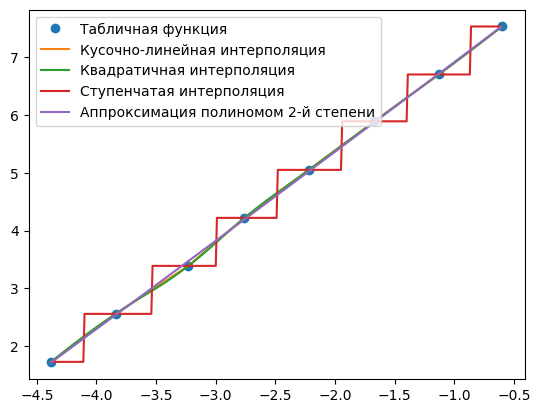

[3.02262295 4.92703704 6.74698113 8.78283019]


In [5]:
import numpy as np

def piecewise_linear_interpolation(x, y, x_query):

    # Проверка на то, что x и y имеют одинаковую длину
    assert len(x) == len(y)

    # Инициализация результата
    y_query = np.zeros_like(x_query)

    # Цикл по точкам, для которых нужно рассчитать значение функции
    for i, x_q in enumerate(x_query):
        # Поиск интервала, в котором находится точка
        idx = np.searchsorted(x, x_q) - 1
        if idx < 0:
            idx = 0
        elif idx >= len(x) - 1:
            idx = len(x) - 2

        # Рассчет коэффициентов прямой, проходящей через узлы
        x1, x2 = x[idx], x[idx + 1]
        y1, y2 = y[idx], y[idx + 1]
        k = (y2 - y1) / (x2 - x1)
        b = y1 - k * x1

        # Рассчет значения функции в точке
        y_query[i] = k * x_q + b

    return y_query

x_interp = np.arange(x.min(), x.max(), 0.01)
y_interp_piecewise = piecewise_linear_interpolation(x, y, x_interp)

# Интерполяция с помощью квадратичной функции
from scipy.interpolate import interp1d
f_quad = interp1d(x, y, kind='quadratic')
y_interp_quad = f_quad(x_interp)

# Интерполяция с помощью ступенчатой функции
f_step = interp1d(x, y, kind='nearest')
y_interp_step = f_step(x_interp)

# Аппроксимация с помощью полинома 2-й степени
coeffs = np.polyfit(x, y, 2)
p = np.poly1d(coeffs)
y_approx = p(x_interp)

# Визуализация результатов
plt.plot(x, y, 'o', label='Табличная функция')
plt.plot(x_interp, y_interp_piecewise, label='Кусочно-линейная интерполяция')
plt.plot(x_interp, y_interp_quad, label='Квадратичная интерполяция')
plt.plot(x_interp, y_interp_step, label='Ступенчатая интерполяция')
plt.plot(x_interp, y_approx, label='Аппроксимация полиномом 2-й степени')
plt.legend()
plt.show()

x = np.array([-4.38, -3.84, -3.23, -2.76, -2.22, -1.67, -1.13, -0.60])
y = np.array([1.73, 2.56, 3.39, 4.22, 5.05, 5.89, 6.70, 7.53])
x_query = np.array([-3.5, -2.3, -1.1, 0.2])
y_query = piecewise_linear_interpolation(x, y, x_query)
print(y_query)

### Задание 4
Создайте функцию для аппроксимации табличной функции методом наименьших квадратов. Функция должна получать на вход numpy-массивы x, y, x_new и возвращать значение приближающей функции в точке (точках) f(x_new). Для решения системы линейных алгебраических уравнений при решении задачи поиска коэффициентов приближающей функции использует функцию numpy.linalg.solve. При среднеквадратичной аппроксимации использовать квадратичный трёхчлен (полином 2-й степени) ax2 + bx + c. Рассчитайте сумму квадратов отклонений (sum of squared errors - SSE) приближающей функции от исходной (табличной) в узлах исходной функции.

In [7]:
import numpy as np

def approximate_function(x, y, x_new):
    
    # Формирование матрицы коэффициентов
    A = np.vstack([x**2, x, np.ones(len(x))]).T

    # Решение системы линейных алгебраических уравнений
    coeffs, _, _, _ = np.linalg.lstsq(A, y, rcond=None)

    # Формирование приближающей функции
    f_x_new = coeffs[0] * x_new**2 + coeffs[1] * x_new + coeffs[2]

    return f_x_new

# Табличная функция
x = np.array([-4.38, -3.84, -3.23, -2.76, -2.22, -1.67, -1.13, -0.60])
y = np.array([1.73, 2.56, 3.39, 4.22, 5.05, 5.89, 6.70, 7.53])

# Аппроксимация табличной функции
x_new = x
f_x_new = approximate_function(x, y, x_new)

# Рассчет суммы квадратов отклонений (SSE)
sse = np.sum((f_x_new - y)**2)
print("Сумма квадратов отклонений (SSE):", sse)

Сумма квадратов отклонений (SSE): 0.009104477028857071


### Задание 5
Визуально (т.е. "на глаз") оцените вид кривой наиболее точно приближающей табличную функцию (это может быть любая функция: линейная, полином, экспоненциальная, степенная и пр. - постройте некоторые из них для примера). Обоснуйте свой выбор (подкрепите графиком приближающей функции выбранного типа) .Используйте функцию scipy.optimize.curve_fit для аппроксимации табличной функции кривой произвольного вида, определив последнюю в виде функции в Python.  Сравните результаты аппроксимации этого шага с предыдущими (визуально и по сумме квадратов отклонений). Определите, какая приближающая функция лучше (по сумме квадратов отклонений). В этом задании можно взять приближающую функцию такого вида, которая была в задании 4 по варианту (при условии того, что визуально она хорошо описывает исходную зависимость) - тогда необходимо убедиться в том, что результаты совпадают.

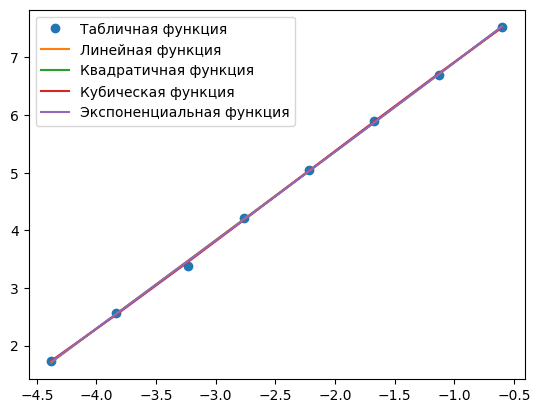

SSE для линейной функции: 0.009553056326046321
SSE для квадратичной функции: 0.009104477028860738
SSE для кубической функции: 0.007556504631954644
SSE для экспоненциальной функции: 0.009108460865565084


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Табличная функция
x = np.array([-4.38, -3.84, -3.23, -2.76, -2.22, -1.67, -1.13, -0.60])
y = np.array([1.73, 2.56, 3.39, 4.22, 5.05, 5.89, 6.70, 7.53])

# Линейная функция
def linear_func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear_func, x, y)
y_linear = linear_func(x, *popt)

# Квадратичная функция
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

popt, pcov = curve_fit(quadratic_func, x, y)
y_quadratic = quadratic_func(x, *popt)

# Кубическая функция
def cubic_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

popt, pcov = curve_fit(cubic_func, x, y)
y_cubic = cubic_func(x, *popt)

# Экспоненциальная функция
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

popt, pcov = curve_fit(exp_func, x, y)
y_exp = exp_func(x, *popt)

# Визуализация результатов
plt.plot(x, y, 'o', label='Табличная функция')
plt.plot(x, y_linear, label='Линейная функция')
plt.plot(x, y_quadratic, label='Квадратичная функция')
plt.plot(x, y_cubic, label='Кубическая функция')
plt.plot(x, y_exp, label='Экспоненциальная функция')
plt.legend()
plt.show()

sse_linear = np.sum((y_linear - y)**2)
sse_quadratic = np.sum((y_quadratic - y)**2)
sse_cubic = np.sum((y_cubic - y)**2)
sse_exp = np.sum((y_exp - y)**2)

print("SSE для линейной функции:", sse_linear)
print("SSE для квадратичной функции:", sse_quadratic)
print("SSE для кубической функции:", sse_cubic)
print("SSE для экспоненциальной функции:", sse_exp)


### Задание 6
Прочитайте данные из файла в две переменные: h и t. Постройте график h(t).

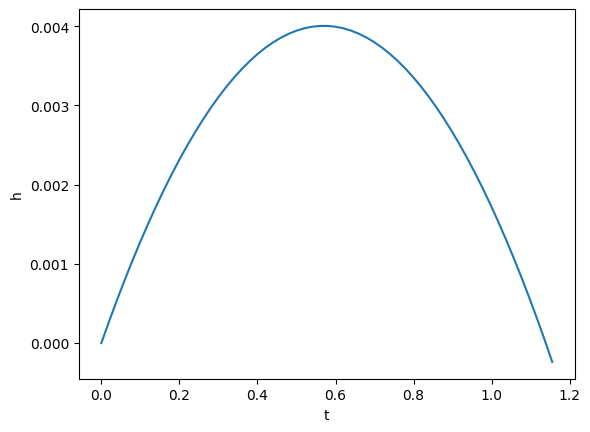

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Импортируем данные из файла Excel
data = pd.read_excel('flight.xlsx')

h = data['y'].to_numpy()
t = data['x'].to_numpy()

plt.plot(t, h)
plt.xlabel('t')
plt.ylabel('h')
plt.show()

### Задание 7
Аппроксимируйте с помощью полинома 2-й степени данные, импортированные Вами в предыдущем задании, и запишите результат в файл:

Задайте массив новых точек X в диапазоне от 0 до 1.15 с шагом 0.01.
Подайте их на вход аппроксимирующей модели (полиному 2-й степени) и запишите результат в новую переменную Y.
Постройте график зависимости Y(X) и сравните его с исходным (полученным в предыдущем задании). Вы получили модель, которая воспроизводит исходную зависимость и рассчитали её в новых точках (на том же диапазоне, но с меньшим шагом).
Сохраните эти данные в файл. Убедитесь, что данные сохранены корректно.

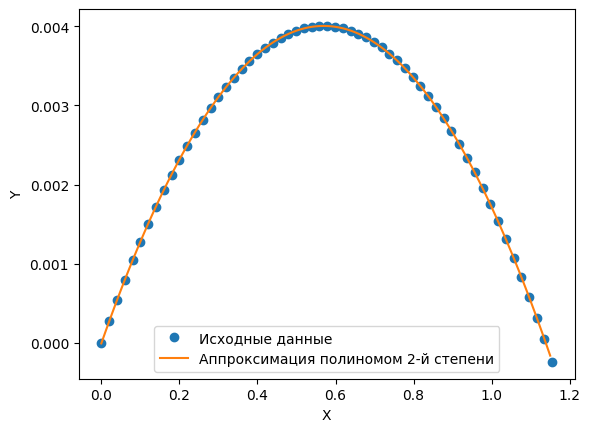

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Импортируем данные из файла Excel
data = pd.read_excel('flight.xlsx')

# Аппроксимируем данные полиномом 2-й степени
z = np.polyfit(data['x'], data['y'], 2)
p = np.poly1d(z)

# Создаем массив новых точек X
x_new = np.arange(0, 1.16, 0.01)

# Вычисляем значения Y для новых точек X
y_new = p(x_new)

# Построим график зависимости Y(X)
plt.plot(data['x'], data['y'], 'o', label='Исходные данные')
plt.plot(x_new, y_new, label='Аппроксимация полиномом 2-й степени')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Сохраняем данные в файл
df = pd.DataFrame({'X': x_new, 'Y': y_new})
df.to_excel('approximation.xlsx', index=False)